# Demonstration of Linear Regression
Data taken from [this dataset](https://www.kaggle.com/andonians/random-linear-regression) for comparability


1. [Load data](##Load-data)
2. [Inspect & Clean data](#Inspect-and-clean-data)
3. [Visualize data](#Visualize-data)
4. [Fit the model](#Fit-the-model)
5. [Make prediction](#Make-prediction)
6. [Final visualization](#Final-visualization)


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5)

## Load data

In [2]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')

## Inspect and clean data

After loading the data we want to get a quick overview of it and discard bad data (in this case all NaNs)


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
train_set = train_set.dropna()     # Here we could have used fillna() to replace the missing values with the mean 
                                   # value, however this was not done since there is only one missing value 

In [5]:
train_set.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


**Now we want to do the same thing with the test set**

In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [7]:
test_set = test_set.dropna()   # This will not change anything since there are no NaNs in the test set

In [8]:
test_set.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


## Visualize data

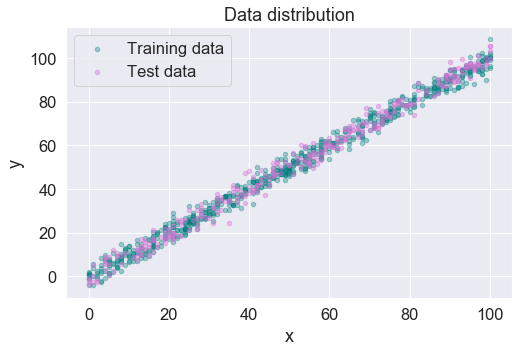

In [9]:
x_train, y_train = train_set.values.T
x_test, y_test = test_set.values.T

fig = plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, s=20, color='teal', alpha=0.35, label='Training data')
plt.scatter(x_test, y_test, s=20, color='orchid', alpha=0.4, label='Test data')
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();


**Observation:** no outliers

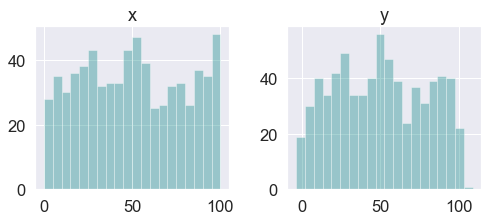

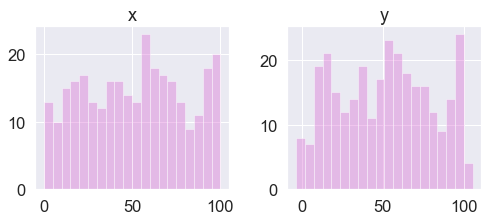

In [10]:
fig_train = train_set.hist(color='teal', alpha=0.35, figsize=(8,3), bins=20);
fig_test = test_set.hist(color='orchid', alpha=0.4, figsize=(8,3), bins=20);

## Fit the model

In [11]:
X_train = x_train[:, np.newaxis] # Reshape to be suitable for fit method

lm = LinearRegression()
lm.fit(X_train, y_train)

r2 = lm.score(X_train, y_train)     # Metric of how good the fit is

print(f'R-square: {r2:.4f}')        # r2 = 0.9907 means large (almost perfect() linear association

R-square: 0.9907


## Make prediction

In [12]:
X_test = x_test[:, np.newaxis] # Reshape to be suitable for fit method

y_pred = lm.predict(X_test)
MSE = mean_squared_error(y_pred, y_test)

print(f'MSE: {MSE:4f}')

MSE: 9.432922


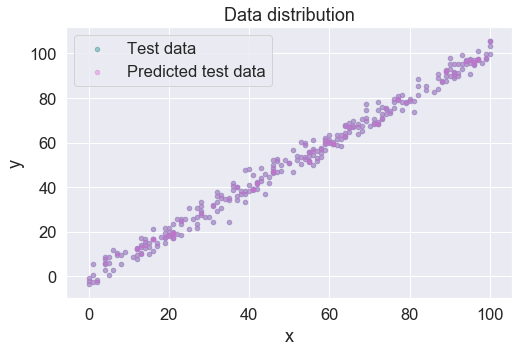

In [13]:
fig = plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, s=20, color='teal', alpha=0.35, label='Test data')
plt.scatter(x_test, y_test, s=20, color='orchid', alpha=0.4, label='Predicted test data')
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# Final visualization

In [14]:
a = lm.coef_
b = lm.intercept_

x_arr = np.arange(0,100)
y_arr = a*x_arr+b

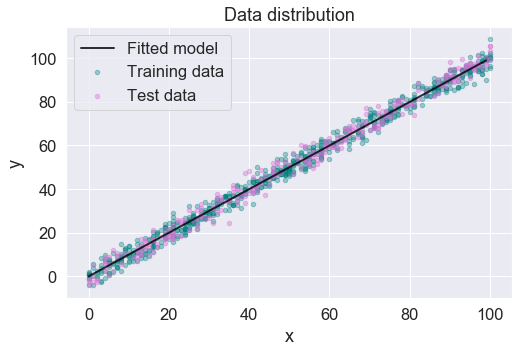

In [15]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x_train, y_train, s=20, color='teal', alpha=0.35, label='Training data')
plt.scatter(x_test, y_test, s=20, color='orchid', alpha=0.4, label='Test data')
plt.plot(x_arr, y_arr, color='black', linewidth=2, alpha=0.8, label='Fitted model')

plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**We can see that this is a good prediction :)**